# UBC Scientific Software Seminar

September 29, 2017

* Introduction to Kaggle
    * Competitions, datasets, kernels, and community
* Getting Started
    * Titanic: Machine Learning from Disaster
    * Make a submission using a Decision Tree Classifier

## Introduction to Kaggle

[Kaggle](https://www.kaggle.com/) hosts data science competitions and is also an online community of data scientists who share ideas and code to learn and collaborate. The goal of our seminar this semester is to work as a group and make submissions to current Kaggle competitions. Before we enter a competition, let's take a look around Kaggle.

### Competitions

Competitions can be categorized according to the type of data and predictions involved. Those involving images most likely require deep neural networks, and competitions involving text require a natural language processing toolkit.

#### Image processing

[Passenger Screening Algorithm Challenge](https://www.kaggle.com/c/passenger-screening-algorithm-challenge): Improve the accuracy of the Department of Homeland Security's threat recognition algorithms

[NIPS 2017: Non-targeted Adversarial Attack](https://www.kaggle.com/c/nips-2017-non-targeted-adversarial-attack): Imperceptibly transform images in ways that fool classification models

The idea of fooling an image classifiation model reminds me of a talk by [Julia Evans](https://jvns.ca/):

In [1]:
from IPython.display import YouTubeVideo

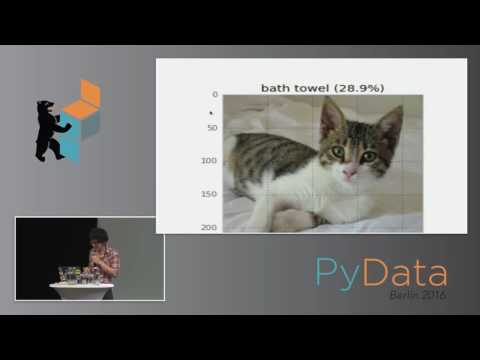

In [2]:
YouTubeVideo("IvF-KbgymXo")

#### Natural Language Processing

[Text Normalization Challenge - English Language](https://www.kaggle.com/c/text-normalization-challenge-english-language): Convert English text from written expressions into spoken form

#### Regression

[Zillow Prize: Zillow’s Home Value Prediction (Zestimate)](https://www.kaggle.com/c/zillow-prize-1): 
Can you improve the algorithm that changed the world of real estate?

### Kernels

Kernels are notebooks (written in R, Python, Julia, etc.) by members of the Kaggle community to share ideas about datasets and competitions. We found an especially well-written notebook about the Zillow competition by navigating to the Zillow competition page, clicking Kernels, and then filtering by notebooks written in Python with the most votes. The notebook is called [Simple Exploration Notebook - Zillow Prize](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize) by [SRK](https://www.kaggle.com/sudalairajkumar). In fact, SRK is the #1 Kernel author on Kaggle!

## Getting Started

Let's start hacking on some data! Looking at the list of competitions and filtering by "Getting Started", we find the Titanic dataset which says "Start here!". Let's take Kaggle's advice and dive into the [Titanic competition](https://www.kaggle.com/c/titanic).

The file containing the training data is called `train.csv`. Download the file into the same folder as this notebook to execute the code below. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
data.shape

(891, 12)

The training dataset includes 891 samples with 12 features. Let's take a look.

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The data dictionary on the competition page says that the "Survived" column indicates 1=Yes 0=No. Let's count the survivors to see the total.

In [8]:
data['Survived'].sum()

342

The first thing to do is visualize the data to get a sense of it. Let's plot the number of survivors by sex and ticket class.

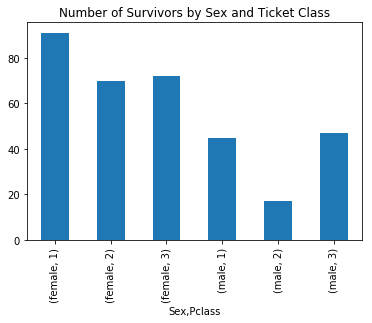

In [9]:
data.groupby(["Sex","Pclass"])["Survived"].sum().plot(kind="bar",title="Number of Survivors by Sex and Ticket Class");

Let's plot fare versus age and use colors to label the points by survival.

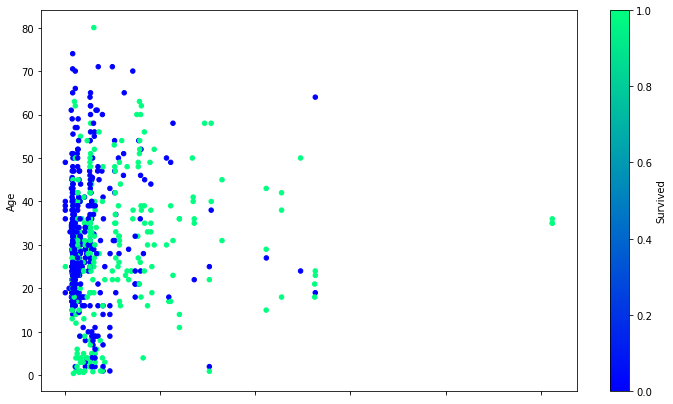

In [10]:
data.plot(kind="scatter",x="Fare",y="Age",c="Survived",cmap="winter",figsize=(12,7));

### Make a submission using a Decision Tree Classifier

A [decision tree](http://scikit-learn.org/stable/modules/tree.html#tree) is a basic kind of non-parametric model. Let's use the `DecisionTreeClassifier` algorithm in scikit-learn with the default options and then make a submission to the Kaggle competition and see how we do!

First of all, the decision tree classifier requires numeric features and so let's transform the string values in the `Sex` column into numeric values.

In [11]:
gender = {'male': 0, 'female': 1}

In [12]:
data['Gender'] = data['Sex'].map(gender)

Notice also that there are missing values in the `Age` column.

In [13]:
data[data['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1


I don't know how to fill in the missing values and so let's just set it to 0. This is something we should consider more carefully.

In [14]:
data['Age'] = data['Age'].fillna(0)

Now let's select all the numeric columns (excluding `PassengerId` and `Survived`) and set this as our sample data `X`. Let's select the `Survived` column as the target `y`.

In [15]:
X = data.iloc[:,[2,5,6,7,9,12]].values
y = data['Survived'].values

Now let's import the `DecisionTreeClassifier` class from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) and instantiate a classifier object (and call it `clf`).

In [16]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [17]:
clf = DTC()

Let's fit the tree to the data.

In [18]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Now we can make predictions on the test data. Let's import it and take a look.

In [19]:
test = pd.read_csv('test.csv')

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Let's do the same processing to the test data as we did to the sample data: translate male/female into numeric values, fill in missing values in the age column (and the fare column since we are missing one value in the test data), and finally select only the numeric columns.

In [21]:
test['Gender'] = test['Sex'].map(gender)
test['Age'] = test['Age'].fillna(0)
test['Fare'] = test['Fare'].fillna(0)
X_test = test.iloc[:,[1,4,5,6,8,11]]

Make our predictions!

In [22]:
predictions = clf.predict(X_test)

In [23]:
predictions.shape

(418,)

The instructions on [Kaggle](https://www.kaggle.com/c/titanic) for this competition say to submit predictions as a `.csv` file with headers `PassengerId` and `Survived`. Let's take our predictions and the passenger id column from the test data and make a new dataframe.

In [24]:
submission = pd.DataFrame({ 'PassengerId': test['PassengerId'], 'Survived': pd.Series(predictions)})

In [25]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


Finally, save this as a `.csv` file.

In [26]:
submission.to_csv('submission.csv', index=False)

We're ready to make a submission to the Kaggle competition... and this submission scored 0.66985 which puts us at position 7850 on the leaderboard. Yikes! We need to make a better model. Next time!